## pyKNEEr

# Segmenting MR Knee Images

Segmentation is performed using an atlas-based algorithm. Given a segmented image (reference image), we use registration to segment each image (moving image) of the dataset. 

The segmentation consists of two parts:  
- Segment bone (used to initialize femoral cartilage segmentation)
- Segment cartilage

Each part is composed of 3 steps:  
- Step 1: Register image to reference. The moving image is registered to the reference image using rigid, similarity and spline transformations
- Step 2: Invert transformation. Transformations are inverted
- Step 3: Warp reference mask to moving image. Inverted transformations are applied to the mask of the reference image to obtain the mask of the moving image

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import pykneer_io          as io
import segmentation_for_nb as segm

## Image information

Inputs:   
- `inputFileName` contains the list of the images to be segmented 
- `nOfCores` is the number of cores used for computations (computations are parallelized for speed)

In [3]:
inputFileName = "/home/users/sbonaret/pykneer/image_list_newsubject_OAI1_DESS.txt"
modality      = 'newsubject' # segmentation of new subjects
nOfCores      = 10

#### Reading image data
- `imageData` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
imageData = io.load_image_data_segmentation(modality, inputFileName)

-> image information loaded


## Reference image

The reference image is the number 9 of the current dataset. It was selected as a results of a convergence study described in the paper.
Here we check if femur mask and femur cartilage masks of the reference image are present

In [5]:
segm.prepare_reference(imageData)

reference.mha
-> Reference preparation completed


## Segment bone

#### 1. Register image to reference

In [6]:
segm.register_bone_to_reference(imageData, nOfCores)

-> Registration completed
-> The total time was 704.77 seconds (about 11 min)


#### 2. Invert transformations

In [7]:
segm.invert_bone_transformations(imageData, nOfCores)

-> Inversion completed
-> The total time was 362.24 seconds (about 6 min)


#### 3. Warp reference mask to moving image

In [8]:
segm.warp_bone_mask(imageData, nOfCores)

-> Warping completed
-> The total time was 240.58 seconds (about 4 min)


## Segment cartilage

#### 1. Register image to reference

In [9]:
segm.register_cartilage_to_reference(imageData, nOfCores)

-> Registration completed
-> The total time was 440.84 seconds (about 7 min)


#### 2. Invert transformations

In [10]:
segm.invert_cartilage_transformations(imageData, nOfCores)

-> Inversion completed
-> The total time was 256.98 seconds (about 4 min)


#### 3. Warp reference mask to moving image (optional)

In [11]:
segm.warp_cartilage_mask(imageData, nOfCores)

-> Warping completed
-> The total time was 237.08 seconds (about 3 min)


## Show segmentations
Visual check of the results. For each image (row), segmentation at medial, central, and lateral compartments

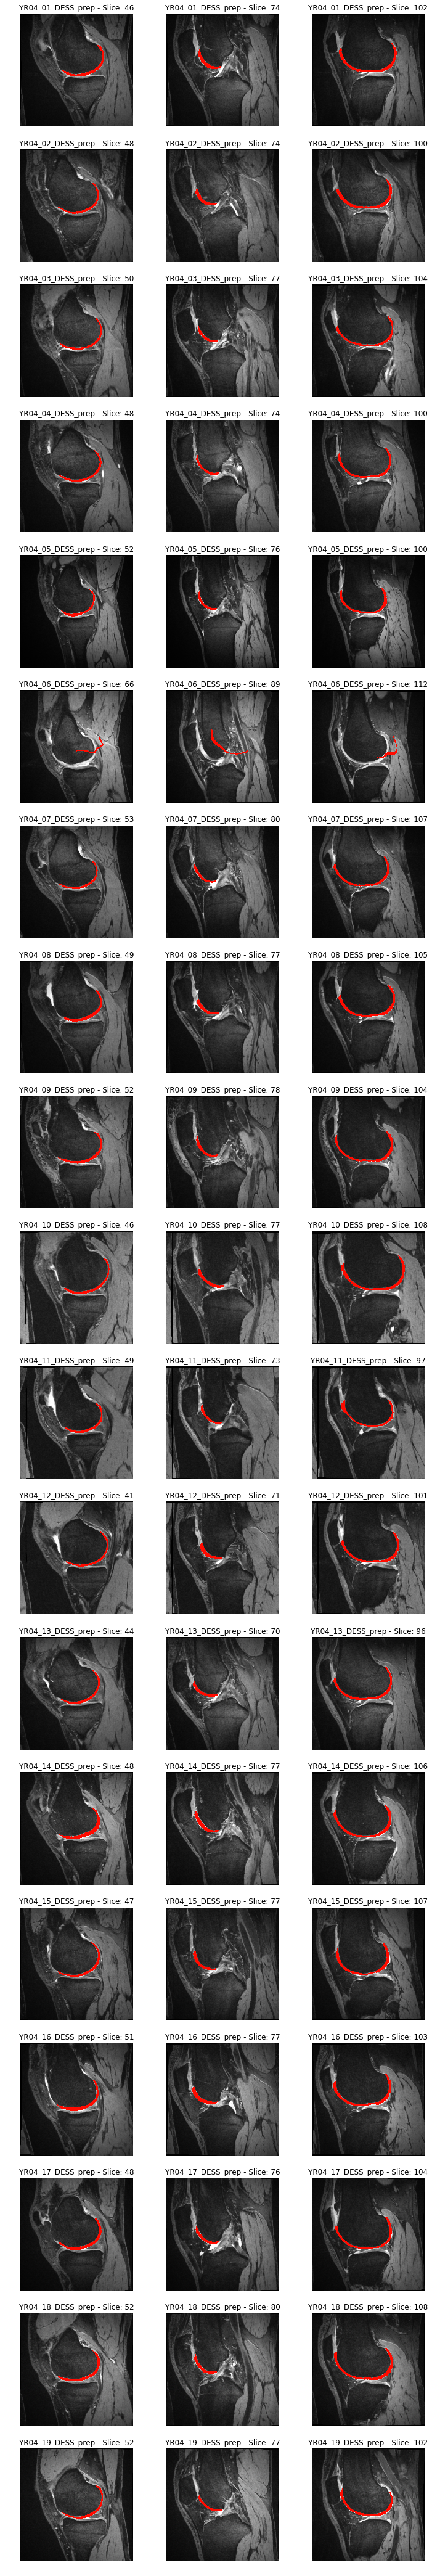

In [12]:
segm.show_segmented_images(imageData)